In [161]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split

In [162]:
train_data = pd.read_csv("data/train_with_embeddings.csv")

In [163]:
# new features
train_data["url_count"] = train_data["urls"].apply(lambda s: s[1:-1].count("\'")/2)
train_data["text_len"] = train_data["text"].apply(lambda s: len(s))
train_data["hashtags_count"] = train_data["hashtags"].apply(lambda s: s[1:-1].count("\'")/2)
train_data["day"] = train_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).day)
train_data["hour"] = train_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).hour)

# text features
train_data["avg_word_len"] = train_data["text"].apply(lambda s: np.mean([len(w) for w in s.split()]))
train_data["rep_words_freq"] = train_data["text"].apply(lambda s: np.mean(len(list(set(s.split())))/len(s.split())))
train_data["rep_chars_freq"] = train_data["text"].apply(lambda s: np.mean(len(list(set(s)))/len(list(s))))
train_data["max_char_freq"] = train_data["text"].apply(lambda s: max( [s.count(c) for c in list(set(s))] )   /len(list(s)))
train_data["avg_word_count"] = train_data["text"].apply(lambda s: len(s.split()))

# indicators of keywords
train_data["Macron"] =  train_data["text"].apply(lambda s: ("macron" in s.lower().split()))
train_data["Zemmour"] =  train_data["text"].apply(lambda s: ("zemmour" in s.lower().split()))
train_data["Melenchon"] =  train_data["text"].apply(lambda s: ("melenchon" in s.replace("é","e").lower().split()))
train_data["rt"] =  train_data["text"].apply(lambda s: ("rt" in s.lower().split()))

In [164]:
# # outlier removal
# train_data = train_data[train_data["retweets_count"] <= 40000]

In [165]:
# from nltk.sentiment import SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()
# print("sentiment analysis...")
# train_data["compound"] =  train_data["text"].apply(lambda s: sia.polarity_scores(s)['compound'])

sentiment analysis...


In [166]:
display(train_data)

,Unnamed: 0,text,retweets_count,favorites_count,followers_count,statuses_count,friends_count,mentions,urls,verified,...,avg_word_len,rep_words_freq,rep_chars_freq,max_char_freq,avg_word_count,Macron,Zemmour,Melenchon,rt,compound
0,0,rt refarcir macron ans nom prépare,3,0,3682,453535,3628,[],[],0,...,4.833333,1.000000,0.411765,0.205882,6,True,False,False,True,0.0000
1,1,populaire,0,0,86,1016,284,[],[],0,...,9.000000,1.000000,0.888889,0.222222,1,False,False,False,False,0.0000
2,2,faut dégager cinglé,3,1,1944,28234,1995,[],[],0,...,5.666667,1.000000,0.736842,0.157895,3,False,False,False,False,0.0000
3,3,enseignants mettre prescriptions président rép...,0,0,1,1072,0,[],['https://t.co/rytlted08g'],0,...,7.857143,0.928571,0.170732,0.138211,14,False,False,False,False,0.0000
4,4,mafieuse oppressive macron,0,0,13957,25311,10841,[],[],0,...,8.000000,1.000000,0.538462,0.153846,3,True,False,False,False,-0.4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353964,353964,gonflette tour raciste frustré,0,0,34,1509,55,[],['https://t.co/pma33zhslx'],0,...,6.750000,1.000000,0.500000,0.166667,4,False,False,False,False,0.0000
353965,353965,france caste crapuleuse encadrée gangsters irr...,0,0,89,11166,127,[],[],0,...,9.000000,1.000000,0.260870,0.159420,7,False,False,False,False,0.0000
353966,353966,eric zemmour français berbère,3,0,1888,712,3086,[],[],0,...,6.500000,1.000000,0.551724,0.172414,4,False,True,False,False,0.0000
353967,353967,gauchistes dépression pq,0,0,139,486,320,[],[],0,...,7.333333,1.000000,0.708333,0.166667,3,False,False,False,False,0.0000


In [167]:
# select useful columns
train_data_filtered = train_data.drop(["text", "urls", "mentions", "hashtags", "timestamp", "TweetID"], axis=1)
# train_data_filtered = train_data.loc[:, ["retweets_count","favorites_count","followers_count","statuses_count","friends_count",
#                                  "hashtags_count","hour","verified","url_count","text_len","rt","Macron","Zemmour","Melenchon"]]


X_train, X_eval, y_train, y_eval = train_test_split(train_data_filtered.drop("retweets_count", axis=1),
                                                    train_data_filtered["retweets_count"],
                                                    random_state=42, test_size=0.1)

# Standardize the data
normal_columns = train_data_filtered.drop(["hour", "verified", "Macron", "Zemmour", "Melenchon", "url_count", "rt", "retweets_count"], axis=1).columns
mu, sigma = X_train[normal_columns].mean(axis=0), X_train[normal_columns].std(axis=0)
X_train.loc[:, normal_columns] = (X_train[normal_columns] - mu) / sigma
X_eval.loc[:, normal_columns] = (X_eval[normal_columns] - mu) / sigma

In [168]:
import tensorflow as tf

In [169]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dense(1),
# ])

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(1),
])

In [170]:
# import tensorflow_addons as tfa
# optimizer = tfa.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4)
# model.compile(optimizer=optimizer, loss='mae')

In [171]:
model.compile(optimizer="adam", loss='mae')

In [172]:
history = model.fit(X_train.values.astype(np.float32), y_train.values.astype(np.float32), epochs=200, batch_size=1024,
         validation_data=(X_eval.values.astype(np.float32), y_eval.values.astype(np.float32)), shuffle=True)

Epoch 1/200
312/312 [==============================] - 1s 3ms/step - loss: 15.1474 - val_loss: 15.7501
Epoch 2/200
312/312 [==============================] - 1s 3ms/step - loss: 10.7590 - val_loss: 7.4308
Epoch 3/200
312/312 [==============================] - 1s 3ms/step - loss: 7.0740 - val_loss: 7.1695
Epoch 4/200
312/312 [==============================] - 1s 3ms/step - loss: 6.9069 - val_loss: 7.0469
Epoch 5/200
312/312 [==============================] - 1s 2ms/step - loss: 6.8421 - val_loss: 7.1152
Epoch 6/200
312/312 [==============================] - 1s 2ms/step - loss: 6.7818 - val_loss: 6.9519
Epoch 7/200
312/312 [==============================] - 0s 1ms/step - loss: 6.7330 - val_loss: 7.0741
Epoch 8/200
312/312 [==============================] - 1s 2ms/step - loss: 6.6718 - val_loss: 6.9497
Epoch 9/200
312/312 [==============================] - 1s 3ms/step - loss: 6.6097 - val_loss: 6.9819
Epoch 10/200
312/312 [==============================] - 1s 2ms/step - loss: 6.5785 - val

KeyboardInterrupt: 

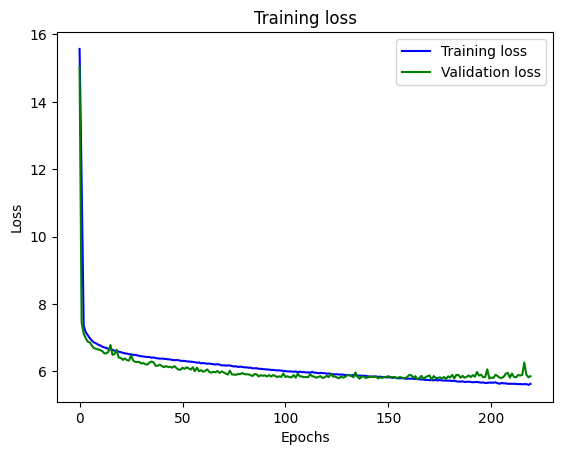

In [ ]:
plt.plot(history.epoch, history.history["loss"], 'b', label='Training loss')
plt.plot(history.epoch, history.history["val_loss"], 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_eval.values.astype(np.float32),  y_eval.values.astype(np.float32), verbose=2)

1107/1107 - 1s - loss: 5.8596 - 718ms/epoch - 649us/step


5.85959529876709

In [ ]:
pred = model.predict(X_train.values.astype(np.float32))
print(pred)

9956/9956 [==============================] - 5s 484us/step
[[-0.00161982]
 [ 1.0689433 ]
 [-0.00469404]
 ...
 [ 1.1079342 ]
 [ 0.38836724]
 [ 1.0198526 ]]


In [ ]:
# plt.scatter(X_train["favorites_count"], model.predict(X_train))
# plt.scatter(X_train["favorites_count"], y_train.values.astype(np.float32))

In [ ]:
# evaluation

eval_data = pd.read_csv("data/evaluation_with_embeddings.csv")
tweets = eval_data["TweetID"]

In [ ]:
eval_data["url_count"] = eval_data["urls"].apply(lambda s: s[1:-1].count("\'")/2)
eval_data["text_len"] = eval_data["text"].apply(lambda s: len(s))
eval_data["hashtags_count"] = eval_data["hashtags"].apply(lambda s: s[1:-1].count("\'")/2)
eval_data["day"] = eval_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).day)
eval_data["hour"] = eval_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).hour)
eval_data["Macron"] =  eval_data["text"].apply(lambda s: ("macron" in s.lower().split()))
eval_data["Zemmour"] =  eval_data["text"].apply(lambda s: ("zemmour" in s.lower().split()))
eval_data["Melenchon"] =  eval_data["text"].apply(lambda s: ("melenchon" in s.lower().split()))
eval_data["rt"] =  eval_data["text"].apply(lambda s: ("rt" in s.lower().split()))
eval_data["avg_word_len"] = eval_data["text"].apply(lambda s: np.mean([len(w) for w in s.split()]))
eval_data["rep_words_freq"] = eval_data["text"].apply(lambda s: np.mean(len(list(set(s.split())))/len(s.split())))
eval_data["rep_chars_freq"] = eval_data["text"].apply(lambda s: np.mean(len(list(set(s)))/len(list(s))))
eval_data["max_char_freq"] = eval_data["text"].apply(lambda s: max( [s.count(c) for c in list(set(s))] )/len(list(s)))

# print("sentiment analysis...")
# eval_data["compound"] =  eval_data["text"].apply(lambda s: sia.polarity_scores(s)['compound'])

eval_data = eval_data.drop(["text", "urls", "mentions", "hashtags", "timestamp", "TweetID"], axis=1)

# normalize
eval_data.loc[:, normal_columns] = (eval_data.loc[:, normal_columns] - mu) / sigma

print(eval_data)

pred = model.predict(eval_data.values.astype(np.float32))

print(pred)

# output normalization
for i,p in enumerate(pred):
    if p<0: pred[i] = 0

KeyError: "['avg_word_count', 'compound'] not in index"

In [ ]:
print(pred)

[[5.9171066e-02]
 [1.4402901e-01]
 [3.0538517e-01]
 ...
 [2.8213394e+00]
 [2.3125261e-03]
 [1.4682983e-01]]


In [ ]:
with open("data/predictions.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["TweetID", "retweets_count"])
    for index, prediction in enumerate(pred):
        writer.writerow([str(tweets[index]) , str(int(prediction))])